# Exercise: Climate

#### Summary

Do nothing very useful with climate data from the US government.

#### Data Source(s)

Data from NOAA, https://www7.ncdc.noaa.gov/CDO/CDODivisionalSelect.jsp

#### Files

- CDODiv8449537379627.txt, climate data from 1985-2017
- florida.txt, california.txt, virginia.txt, minnesota.txt, nebraska.txt, same as above but for specific states

#### Data dictionary

- **PCP** - Precipitation Index
- **TAVG** - Temperature Index
- **TMIN** - Minimum Temperature Index
- **TMAX** - Maximum Temperature Index
- **PDSI** - Palmer Drought Severity Index
- **PHDI** - Palmer Hydrological Drought Index
- **ZNDX** - Palmer Z-Index
- **PMDI** - Modified Palmer Drought Severity Index
- **CDD** - Cooling Degree Days
- **HDD** - Heating Degree Days
- **SPnn** - Standard Precipitation Index

#### Skills

- Cleaning column names
- NaN values
- Date time manipulation
- Plotting

# Reading in your data

## Open up the file and check the first few rows

In [244]:
import pandas as pd
%matplotlib inline

In [245]:
df = pd.read_csv("data/climate/CDODiv8449537379627.txt")
df.head(10)

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Unnamed: 20
0,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,1017,1.79,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,16.52,36.86,NaN
1,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,974,-1.69,0.52,-99.99,-99.99,-99.99,-99.99,-99.99,15.57,37.65,NaN
2,110,0,189503,1.99,39.97,-0.83,-0.83,-1.28,-0.83,13,692,-1.09,-2.11,-0.16,-99.99,-99.99,-99.99,-99.99,27.86,52.07,NaN
3,110,0,189504,1.99,52.90,-1.42,-1.42,-2.02,-1.42,27,345,-1.24,-1.62,-2.86,-99.99,-99.99,-99.99,-99.99,39.45,66.33,NaN
4,110,0,189505,2.88,59.94,0.04,-1.23,0.12,-1.08,88,155,-0.03,-0.78,-1.15,-99.99,-99.99,-99.99,-99.99,47.05,72.81,NaN
5,110,0,189506,2.95,67.80,0.20,-0.94,0.51,-0.43,225,34,-0.03,-0.06,-0.59,-0.58,-99.99,-99.99,-99.99,54.72,80.89,NaN
6,110,0,189507,3.00,71.24,0.78,0.78,1.78,0.78,256,19,0.56,0.27,0.13,-1.09,-99.99,-99.99,-99.99,58.55,83.91,NaN
7,110,0,189508,2.53,71.62,0.95,0.95,0.74,0.95,282,17,-0.21,0.15,0.10,-0.75,-99.99,-99.99,-99.99,58.32,84.90,NaN
8,110,0,189509,1.58,65.57,-0.89,-0.89,-2.68,-0.89,190,59,-1.94,-1.65,-1.04,-1.02,-0.95,-99.99,-99.99,52.38,78.73,NaN
9,110,0,189510,1.08,50.85,-1.42,-1.42,-1.86,-1.42,31,388,-2.02,-2.42,-2.23,-1.34,-1.89,-99.99,-99.99,37.15,64.54,NaN


## Hmmm, `-99.99` doesn't seem like good data!

And if you read [the documentation](ftp://ftp.ncdc.noaa.gov/pub/data/cirs/climdiv/divisional-readme.txt), you find out it means MISSING DATA. Get rid of those -99.99s however you think is best.

In [246]:
df = pd.read_csv("data/climate/CDODiv8449537379627.txt", na_values=[-99.99, -99.90, -9.99, -9999, -99.99])
df.head(10)

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Unnamed: 20
0,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,1017,1.79,NaN,NaN,NaN,NaN,NaN,NaN,16.52,36.86,NaN
1,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,974,-1.69,0.52,NaN,NaN,NaN,NaN,NaN,15.57,37.65,NaN
2,110,0,189503,1.99,39.97,-0.83,-0.83,-1.28,-0.83,13,692,-1.09,-2.11,-0.16,NaN,NaN,NaN,NaN,27.86,52.07,NaN
3,110,0,189504,1.99,52.90,-1.42,-1.42,-2.02,-1.42,27,345,-1.24,-1.62,-2.86,NaN,NaN,NaN,NaN,39.45,66.33,NaN
4,110,0,189505,2.88,59.94,0.04,-1.23,0.12,-1.08,88,155,-0.03,-0.78,-1.15,NaN,NaN,NaN,NaN,47.05,72.81,NaN
5,110,0,189506,2.95,67.80,0.20,-0.94,0.51,-0.43,225,34,-0.03,-0.06,-0.59,-0.58,NaN,NaN,NaN,54.72,80.89,NaN
6,110,0,189507,3.00,71.24,0.78,0.78,1.78,0.78,256,19,0.56,0.27,0.13,-1.09,NaN,NaN,NaN,58.55,83.91,NaN
7,110,0,189508,2.53,71.62,0.95,0.95,0.74,0.95,282,17,-0.21,0.15,0.10,-0.75,NaN,NaN,NaN,58.32,84.90,NaN
8,110,0,189509,1.58,65.57,-0.89,-0.89,-2.68,-0.89,190,59,-1.94,-1.65,-1.04,-1.02,-0.95,NaN,NaN,52.38,78.73,NaN
9,110,0,189510,1.08,50.85,-1.42,-1.42,-1.86,-1.42,31,388,-2.02,-2.42,-2.23,-1.34,-1.89,NaN,NaN,37.15,64.54,NaN


## Wait, there's even more missing data!

Open up [the documentation](ftp://ftp.ncdc.noaa.gov/pub/data/cirs/climdiv/divisional-readme.txt) and look for the other values that are "missing."

- Tip: don't read all of the documentation, use the power of searching!

## Confirm that you have 1465 rows and 21 columns

In [247]:
df.shape

(1465, 21)

## Let's see the columns and their data types

In [248]:
df.dtypes

StateCode        int64
Division         int64
YearMonth        int64
    PCP        float64
   TAVG        float64
   PDSI        float64
   PHDI        float64
   ZNDX        float64
   PMDI        float64
    CDD          int64
    HDD          int64
   SP01        float64
   SP02        float64
   SP03        float64
   SP06        float64
   SP09        float64
   SP12        float64
   SP24        float64
   TMIN        float64
   TMAX        float64
Unnamed: 20    float64
dtype: object

## Uuuuhhh something is weird

Try to get the average `TMAX`. It *probably* will not work. Why not?

In [249]:
#there is a key-error, what means, the column can't be read on the right way.
#there is too much space next to the key-word. 

## Cleaning up

### Fix the column names!

Right now TMAX (and the rest of the column names) are looking pretty bad. Let's turn them into normal columns! **If you couldn't figure out what's wrong with them, ask!**

- Tip: You can get a list of the columns by using `df.columns`.
- Tip: You can actually treat them just like a pandas column
- Tip: What would you use if you had to remove whitespace (spaces) from the left and right of a column in pandas?
- Tip: Instead of using rename, you can set the columns to something new with `df.columns = blah blah blah` (but be sure to **check that your edited ones are right** before you assign them)

In [250]:
df.columns

Index(['StateCode', 'Division', 'YearMonth', '    PCP', '   TAVG', '   PDSI',
       '   PHDI', '   ZNDX', '   PMDI', '    CDD', '    HDD', '   SP01',
       '   SP02', '   SP03', '   SP06', '   SP09', '   SP12', '   SP24',
       '   TMIN', '   TMAX', 'Unnamed: 20'],
      dtype='object')

In [251]:
#rename every column manually
#df.columns = ['key1', 'key2', 'key3', 'key4', 'key5', usw.]


In [252]:
#strip one key-word
#'   TMIN'.strip()

In [253]:
#loop trough the list: simple list-comprehension
[column.strip()for column in df.columns]

['StateCode',
 'Division',
 'YearMonth',
 'PCP',
 'TAVG',
 'PDSI',
 'PHDI',
 'ZNDX',
 'PMDI',
 'CDD',
 'HDD',
 'SP01',
 'SP02',
 'SP03',
 'SP06',
 'SP09',
 'SP12',
 'SP24',
 'TMIN',
 'TMAX',
 'Unnamed: 20']

In [254]:
#ist str.strip to strip each one
df.columns = df.columns.str.strip()
df.columns

Index(['StateCode', 'Division', 'YearMonth', 'PCP', 'TAVG', 'PDSI', 'PHDI',
       'ZNDX', 'PMDI', 'CDD', 'HDD', 'SP01', 'SP02', 'SP03', 'SP06', 'SP09',
       'SP12', 'SP24', 'TMIN', 'TMAX', 'Unnamed: 20'],
      dtype='object')

### Find the hottest months recorded

Just to make sure you cleaned it all up correctly - if you didn't clean the column titles, this won't work.

In [255]:
df['TMAX'].head(3)

0    36.86
1    37.65
2    52.07
Name: TMAX, dtype: float64

In [256]:
df.head()

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Unnamed: 20
0,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,1017,1.79,NaN,NaN,NaN,NaN,NaN,NaN,16.52,36.86,NaN
1,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,974,-1.69,0.52,NaN,NaN,NaN,NaN,NaN,15.57,37.65,NaN
2,110,0,189503,1.99,39.97,-0.83,-0.83,-1.28,-0.83,13,692,-1.09,-2.11,-0.16,NaN,NaN,NaN,NaN,27.86,52.07,NaN
3,110,0,189504,1.99,52.90,-1.42,-1.42,-2.02,-1.42,27,345,-1.24,-1.62,-2.86,NaN,NaN,NaN,NaN,39.45,66.33,NaN
4,110,0,189505,2.88,59.94,0.04,-1.23,0.12,-1.08,88,155,-0.03,-0.78,-1.15,NaN,NaN,NaN,NaN,47.05,72.81,NaN


In [257]:
pd.set_option("display.max_columns", 100)

In [258]:
#sorts by key-word
#df.sort_values(by='TMAX').head()
df.sort_values(by='TMAX', ascending=False).head()

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Unnamed: 20
498,110,0,193607,2.31,76.80,-4.73,-4.73,-4.41,-4.73,371,5,-1.35,-2.10,-2.16,-1.70,-1.42,-1.48,-0.77,62.74,90.84,NaN
474,110,0,193407,2.07,76.37,-8.08,-8.08,-4.95,-8.08,384,6,-1.99,-1.55,-2.16,-2.23,-2.37,-2.09,-1.63,62.17,90.55,NaN
78,110,0,190107,2.32,76.24,-1.45,-1.45,-2.37,-1.45,392,7,-1.32,-1.21,-1.15,-0.90,-1.11,-0.63,-0.66,62.55,89.96,NaN
1410,110,0,201207,2.51,76.77,-4.80,-4.80,-3.30,-4.80,402,4,-0.80,-1.43,-1.46,-1.10,-0.88,-0.89,-0.49,63.55,89.96,NaN
1338,110,0,200607,2.46,76.41,-3.66,-3.66,-3.04,-3.66,383,3,-0.94,-1.08,-1.40,-1.41,-0.99,-0.85,0.20,63.23,89.58,NaN


In [259]:
df.sort_values(by='TMAX', ascending=False)[['YearMonth', 'TMAX']].head()

,YearMonth,TMAX
498,193607,90.84
474,193407,90.55
78,190107,89.96
1410,201207,89.96
1338,200607,89.58


## That "Unnamed" column doesn't actually do anything. Delete it!

One of the things we talked about last class was **creating new dataframes** instead of editing our old ones. So we *could* do this:

```python
df = df[['col1', 'col2', 'col2', 'col3']]
```

**But don't do that!** I don't want you to type out all of those columns. I just want you to delete that column.

In [260]:
df.head(2)

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Unnamed: 20
0,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,1017,1.79,NaN,NaN,NaN,NaN,NaN,NaN,16.52,36.86,NaN
1,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,974,-1.69,0.52,NaN,NaN,NaN,NaN,NaN,15.57,37.65,NaN


In [261]:
df.columns

Index(['StateCode', 'Division', 'YearMonth', 'PCP', 'TAVG', 'PDSI', 'PHDI',
       'ZNDX', 'PMDI', 'CDD', 'HDD', 'SP01', 'SP02', 'SP03', 'SP06', 'SP09',
       'SP12', 'SP24', 'TMIN', 'TMAX', 'Unnamed: 20'],
      dtype='object')

In [262]:
del df['Unnamed: 20']

In [263]:
df.columns

Index(['StateCode', 'Division', 'YearMonth', 'PCP', 'TAVG', 'PDSI', 'PHDI',
       'ZNDX', 'PMDI', 'CDD', 'HDD', 'SP01', 'SP02', 'SP03', 'SP06', 'SP09',
       'SP12', 'SP24', 'TMIN', 'TMAX'],
      dtype='object')

## What is the `YearMonth` column?

What is its data type, and what is the content in it?

In [264]:
#df['YearMonth']
df.dtypes

StateCode      int64
Division       int64
YearMonth      int64
PCP          float64
TAVG         float64
PDSI         float64
PHDI         float64
ZNDX         float64
PMDI         float64
CDD            int64
HDD            int64
SP01         float64
SP02         float64
SP03         float64
SP06         float64
SP09         float64
SP12         float64
SP24         float64
TMIN         float64
TMAX         float64
dtype: object

In [265]:
df['YearMonth'].head()

0    189501
1    189502
2    189503
3    189504
4    189505
Name: YearMonth, dtype: int64

In [266]:
#pd.to_datetime(df['YearMonth'], astype(str))
pd.to_datetime(df['YearMonth'].astype(str), format="%Y%m")

0      1895-01-01
1      1895-02-01
2      1895-03-01
3      1895-04-01
4      1895-05-01
5      1895-06-01
6      1895-07-01
7      1895-08-01
8      1895-09-01
9      1895-10-01
10     1895-11-01
11     1895-12-01
12     1896-01-01
13     1896-02-01
14     1896-03-01
15     1896-04-01
16     1896-05-01
17     1896-06-01
18     1896-07-01
19     1896-08-01
20     1896-09-01
21     1896-10-01
22     1896-11-01
23     1896-12-01
24     1897-01-01
25     1897-02-01
26     1897-03-01
27     1897-04-01
28     1897-05-01
29     1897-06-01
          ...    
1435   2014-08-01
1436   2014-09-01
1437   2014-10-01
1438   2014-11-01
1439   2014-12-01
1440   2015-01-01
1441   2015-02-01
1442   2015-03-01
1443   2015-04-01
1444   2015-05-01
1445   2015-06-01
1446   2015-07-01
1447   2015-08-01
1448   2015-09-01
1449   2015-10-01
1450   2015-11-01
1451   2015-12-01
1452   2016-01-01
1453   2016-02-01
1454   2016-03-01
1455   2016-04-01
1456   2016-05-01
1457   2016-06-01
1458   2016-07-01
1459   201

## Convert `YearMonth` into a date (don't save it anywhere yet)

**Be sure to pass a `format=` to the converter.** It will work automatically, but it's better to get practice.

If you convert it correctly, it should look like...

    0      1895-01-01
    1      1895-02-01
    2      1895-03-01
    3      1895-04-01
    ...

## Save this converted version into a new column called `Date`

In [267]:
df['Date'] = pd.to_datetime(df['YearMonth'].astype(str), format="%Y%m")
df.head()

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Date
0,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,1017,1.79,NaN,NaN,NaN,NaN,NaN,NaN,16.52,36.86,1895-01-01
1,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,974,-1.69,0.52,NaN,NaN,NaN,NaN,NaN,15.57,37.65,1895-02-01
2,110,0,189503,1.99,39.97,-0.83,-0.83,-1.28,-0.83,13,692,-1.09,-2.11,-0.16,NaN,NaN,NaN,NaN,27.86,52.07,1895-03-01
3,110,0,189504,1.99,52.90,-1.42,-1.42,-2.02,-1.42,27,345,-1.24,-1.62,-2.86,NaN,NaN,NaN,NaN,39.45,66.33,1895-04-01
4,110,0,189505,2.88,59.94,0.04,-1.23,0.12,-1.08,88,155,-0.03,-0.78,-1.15,NaN,NaN,NaN,NaN,47.05,72.81,1895-05-01


In [268]:
df.dtypes

StateCode             int64
Division              int64
YearMonth             int64
PCP                 float64
TAVG                float64
PDSI                float64
PHDI                float64
ZNDX                float64
PMDI                float64
CDD                   int64
HDD                   int64
SP01                float64
SP02                float64
SP03                float64
SP06                float64
SP09                float64
SP12                float64
SP24                float64
TMIN                float64
TMAX                float64
Date         datetime64[ns]
dtype: object

### What is the datatype of the `Date` columns?

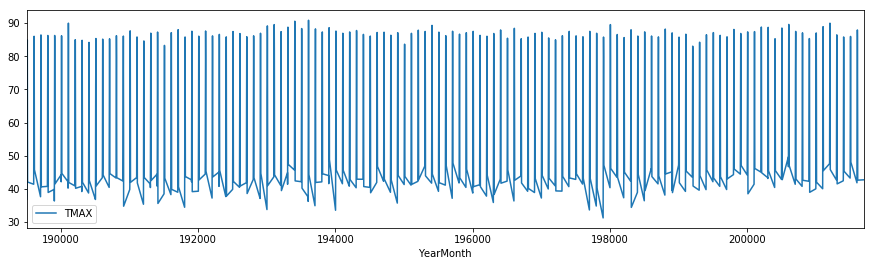

In [269]:
df.plot(x='YearMonth', y='TMAX', figsize=(15, 4))
                                        

# Graphing

## Graph the maximum temperature over time using the old `YearMonth` column

Make it so wide it **extends across your entire screen**.

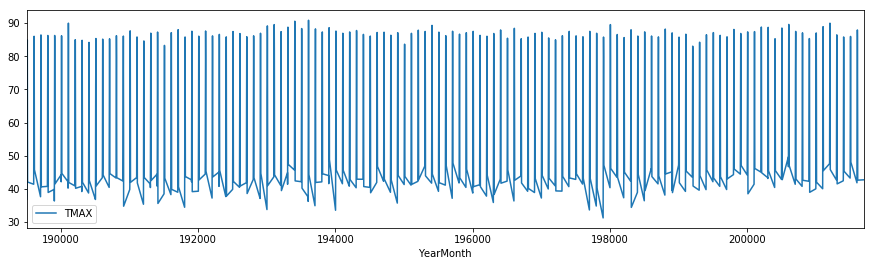

In [270]:
df.plot(x='YearMonth', y='TMAX', figsize=(15, 4))

## Graph the maximum temperature over time using the new `Date` column

Make it so wide it **extends across your entire screen**.

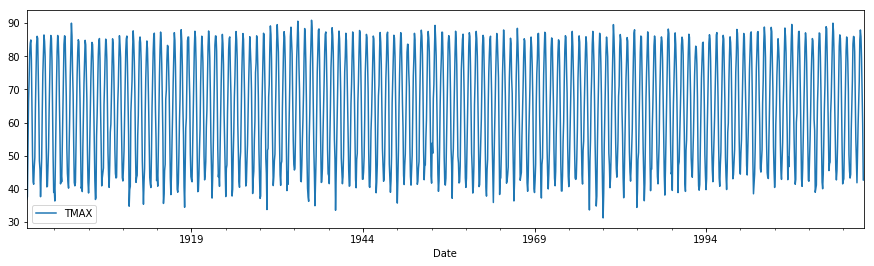

In [271]:
df.plot(x='Date', y='TMAX', figsize=(15, 4))

## How do they look different? Which one is better, and why?

In [272]:
#In the first version he couldn't read the year numbers ----> now the date-version has a clean timeline

# Resampling

Check that you have pandas 0.19.0 or newer by typing `pd.__version__`. If you have an earlier version, use `pip install -U pandas` to update.

In [273]:
pd.__version__

'0.20.2'

## View the average yearly temperature

**Don't use `.set_index` yet.** When using `resample`, you can also say `on='colname'` in order to say "resample using this column instead of using the index. Use that here.

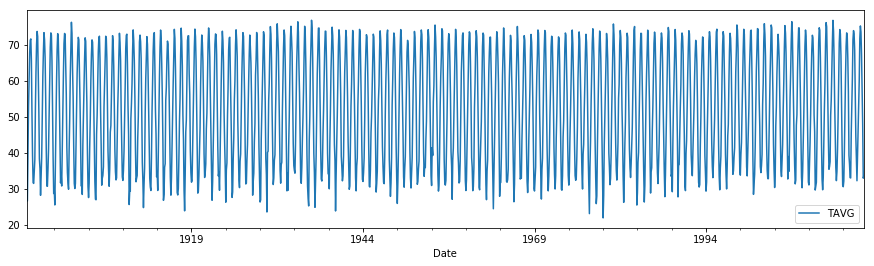

In [274]:
df.plot(x='Date', y='TAVG', figsize=(15, 4))

## Graph the average annual temperature

Be sure ot make it **nice and wide**.

In [275]:
df[['Date', 'TAVG']].head(3)

,Date,TAVG
0,1895-01-01,26.69
1,1895-02-01,26.60
2,1895-03-01,39.97


In [276]:
#df[['Date', 'TAVG']]#.plot(x='Date', y='TAVG', figsize=(15, 4))
df.resample('A', on='Date')['TAVG'].mean()

Date
1895-12-31    50.337500
1896-12-31    51.993333
1897-12-31    51.556667
1898-12-31    51.431667
1899-12-31    51.009167
1900-12-31    52.773333
1901-12-31    51.874167
1902-12-31    51.588333
1903-12-31    50.624167
1904-12-31    51.155000
1905-12-31    50.996667
1906-12-31    51.725000
1907-12-31    51.483333
1908-12-31    52.076667
1909-12-31    51.433333
1910-12-31    52.422500
1911-12-31    52.028333
1912-12-31    50.232500
1913-12-31    51.542500
1914-12-31    51.840000
1915-12-31    51.446667
1916-12-31    50.848333
1917-12-31    50.062500
1918-12-31    51.867500
1919-12-31    51.548333
1920-12-31    51.074167
1921-12-31    53.800000
1922-12-31    52.026667
1923-12-31    51.639167
1924-12-31    50.587500
                ...    
1988-12-31    52.630000
1989-12-31    51.835000
1990-12-31    53.514167
1991-12-31    53.158333
1992-12-31    52.604167
1993-12-31    51.262500
1994-12-31    52.865833
1995-12-31    52.653333
1996-12-31    51.885000
1997-12-31    52.201667
1998-12-31 

## What's wrong with the right-hand side?

Use `.set_index` to get a datetime index and then examine the months in 1990 and the months in 2017 and see what's different about them.

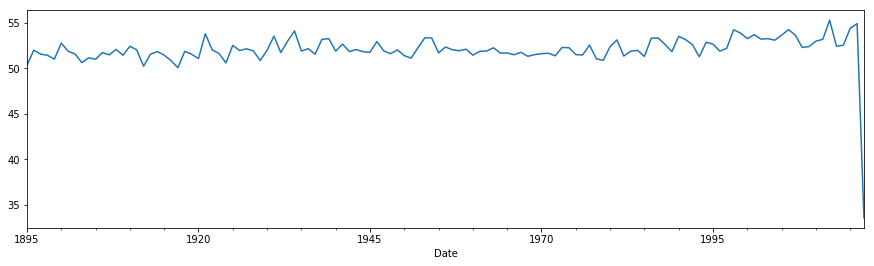

In [277]:
df.resample('A', on='Date')['TAVG'].mean().plot(figsize=(15, 4))

## Upgrading to good data

**We can ignore 2017.** Edit our dataframe so it's only between the years of 1895 and 2016, and draw your graph again.

In [278]:
df.head()

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Date
0,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,1017,1.79,NaN,NaN,NaN,NaN,NaN,NaN,16.52,36.86,1895-01-01
1,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,974,-1.69,0.52,NaN,NaN,NaN,NaN,NaN,15.57,37.65,1895-02-01
2,110,0,189503,1.99,39.97,-0.83,-0.83,-1.28,-0.83,13,692,-1.09,-2.11,-0.16,NaN,NaN,NaN,NaN,27.86,52.07,1895-03-01
3,110,0,189504,1.99,52.90,-1.42,-1.42,-2.02,-1.42,27,345,-1.24,-1.62,-2.86,NaN,NaN,NaN,NaN,39.45,66.33,1895-04-01
4,110,0,189505,2.88,59.94,0.04,-1.23,0.12,-1.08,88,155,-0.03,-0.78,-1.15,NaN,NaN,NaN,NaN,47.05,72.81,1895-05-01


In [279]:
df.set_index('Date', inplace=True)
df.head(2)

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX
Date,,,,,,,,,,,,,,,,,,,,
1895-01-01,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,1017,1.79,NaN,NaN,NaN,NaN,NaN,NaN,16.52,36.86
1895-02-01,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,974,-1.69,0.52,NaN,NaN,NaN,NaN,NaN,15.57,37.65


In [280]:
#all months in 1895
df['1895'].head(2)

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX
Date,,,,,,,,,,,,,,,,,,,,
1895-01-01,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,1017,1.79,NaN,NaN,NaN,NaN,NaN,NaN,16.52,36.86
1895-02-01,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,974,-1.69,0.52,NaN,NaN,NaN,NaN,NaN,15.57,37.65


In [281]:
#we want compare between 1990 and 2017
df['1990']

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX
Date,,,,,,,,,,,,,,,,,,,,
1990-01-01,110,0,199001,2.79,36.50,-1.68,-1.68,-0.94,-1.68,15,727,0.95,-0.64,-0.97,-0.68,0.09,-0.14,-1.17,25.83,47.16
1990-02-01,110,0,199002,2.68,36.70,0.58,-0.92,1.75,0.02,15,650,1.27,1.52,0.07,-0.40,0.18,0.13,-0.83,25.23,48.15
1990-03-01,110,0,199003,2.71,44.74,0.40,-0.96,-0.38,-0.17,22,532,0.48,1.12,1.44,-0.38,-0.14,0.06,-0.63,33.37,56.12
1990-04-01,110,0,199004,2.49,52.52,0.21,-1.00,-0.43,-0.39,30,325,-0.04,0.32,0.88,-0.13,-0.16,0.41,-0.59,40.01,64.99
1990-05-01,110,0,199005,3.83,58.86,1.25,1.25,3.17,1.25,91,193,1.71,1.16,1.08,0.79,0.25,0.64,-0.15,46.83,70.90
1990-06-01,110,0,199006,2.50,70.23,-0.50,0.62,-1.49,-0.37,233,33,-0.99,0.61,0.45,1.29,-0.11,0.05,0.11,57.22,83.25
1990-07-01,110,0,199007,2.94,73.26,-0.25,0.75,0.59,0.09,315,7,0.39,-0.49,0.63,0.93,0.12,0.07,0.16,60.76,85.75
1990-08-01,110,0,199008,2.65,72.28,-0.14,0.76,0.25,0.18,289,12,0.12,0.27,-0.40,0.53,0.43,0.04,0.19,59.63,84.90
1990-09-01,110,0,199009,2.04,67.35,-0.80,-0.80,-2.01,-0.80,171,59,-0.99,-0.67,-0.35,0.09,0.87,-0.24,-0.05,54.34,80.37


In [282]:
#there are no dares ----> just one! 
df['2017']

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX
Date,,,,,,,,,,,,,,,,,,,,
2017-01-01,110,0,201701,3.22,33.55,-0.92,-0.92,0.99,-0.28,15,775,1.64,1.56,0.76,1.34,0.94,1.13,1.89,24.35,42.75


In [283]:
df['1895':'2016']

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX
Date,,,,,,,,,,,,,,,,,,,,
1895-01-01,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,1017,1.79,NaN,NaN,NaN,NaN,NaN,NaN,16.52,36.86
1895-02-01,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,974,-1.69,0.52,NaN,NaN,NaN,NaN,NaN,15.57,37.65
1895-03-01,110,0,189503,1.99,39.97,-0.83,-0.83,-1.28,-0.83,13,692,-1.09,-2.11,-0.16,NaN,NaN,NaN,NaN,27.86,52.07
1895-04-01,110,0,189504,1.99,52.90,-1.42,-1.42,-2.02,-1.42,27,345,-1.24,-1.62,-2.86,NaN,NaN,NaN,NaN,39.45,66.33
1895-05-01,110,0,189505,2.88,59.94,0.04,-1.23,0.12,-1.08,88,155,-0.03,-0.78,-1.15,NaN,NaN,NaN,NaN,47.05,72.81
1895-06-01,110,0,189506,2.95,67.80,0.20,-0.94,0.51,-0.43,225,34,-0.03,-0.06,-0.59,-0.58,NaN,NaN,NaN,54.72,80.89
1895-07-01,110,0,189507,3.00,71.24,0.78,0.78,1.78,0.78,256,19,0.56,0.27,0.13,-1.09,NaN,NaN,NaN,58.55,83.91
1895-08-01,110,0,189508,2.53,71.62,0.95,0.95,0.74,0.95,282,17,-0.21,0.15,0.10,-0.75,NaN,NaN,NaN,58.32,84.90
1895-09-01,110,0,189509,1.58,65.57,-0.89,-0.89,-2.68,-0.89,190,59,-1.94,-1.65,-1.04,-1.02,-0.95,NaN,NaN,52.38,78.73


In [284]:
df = df['1895':'2016']

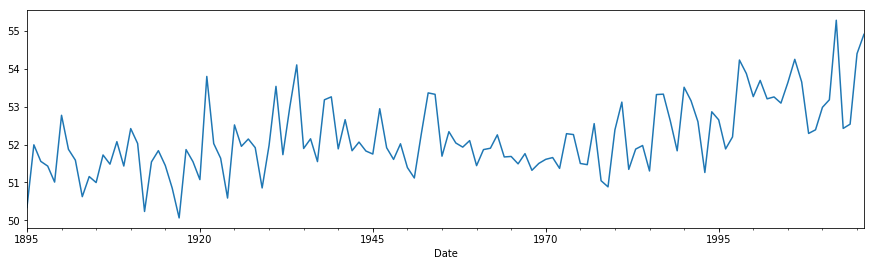

In [285]:
#save the new range in our new dataframe and plot it again!
df.resample('A')['TAVG'].mean().plot(figsize=(15, 4)) #Date exists no more as a column (index) ----> Delete it! 

### Maxes and mins

What years had the hottest maximum temperature? The hottest minimum temperature?

In [286]:
df.resample('A')['TMAX'].max().sort_values().head()

Date
1992-12-31    83.03
1915-12-31    83.26
1950-12-31    83.62
1904-12-31    84.16
1993-12-31    84.22
Name: TMAX, dtype: float64

In [287]:
df.resample('A')['TMAX'].max().sort_values(ascending=False).head()

Date
1936-12-31    90.84
1934-12-31    90.55
1901-12-31    89.96
2012-12-31    89.96
2006-12-31    89.58
Name: TMAX, dtype: float64

In [288]:
df.dtypes

StateCode      int64
Division       int64
YearMonth      int64
PCP          float64
TAVG         float64
PDSI         float64
PHDI         float64
ZNDX         float64
PMDI         float64
CDD            int64
HDD            int64
SP01         float64
SP02         float64
SP03         float64
SP06         float64
SP09         float64
SP12         float64
SP24         float64
TMIN         float64
TMAX         float64
dtype: object

In [289]:
#df.resample('A')['TMAX'].max().sort_index().head()

In [290]:
df.resample('A')['TMIN'].min().sort_values().head()

Date
1977-12-31    12.52
1979-12-31    12.58
1963-12-31    12.97
1918-12-31    13.28
1930-12-31    13.32
Name: TMIN, dtype: float64

In [291]:
#the value each year in december
df.resample('A')['TMIN'].min().sort_values(ascending=False).head(10)

Date
1998-12-31    25.11
2012-12-31    24.67
1921-12-31    24.24
2002-12-31    23.90
1995-12-31    23.56
1953-12-31    23.41
1986-12-31    23.32
1999-12-31    23.13
2006-12-31    22.98
1941-12-31    22.86
Name: TMIN, dtype: float64

## Annual temperature cycles

Graph the average temperature cycle of a year, with january on the left and december on the right.

In [292]:
df.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Date', length=1464)

In [293]:
df['mon'] = df.index.month
df.head()

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,mon
Date,,,,,,,,,,,,,,,,,,,,,
1895-01-01,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,1017,1.79,NaN,NaN,NaN,NaN,NaN,NaN,16.52,36.86,1
1895-02-01,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,974,-1.69,0.52,NaN,NaN,NaN,NaN,NaN,15.57,37.65,2
1895-03-01,110,0,189503,1.99,39.97,-0.83,-0.83,-1.28,-0.83,13,692,-1.09,-2.11,-0.16,NaN,NaN,NaN,NaN,27.86,52.07,3
1895-04-01,110,0,189504,1.99,52.90,-1.42,-1.42,-2.02,-1.42,27,345,-1.24,-1.62,-2.86,NaN,NaN,NaN,NaN,39.45,66.33,4
1895-05-01,110,0,189505,2.88,59.94,0.04,-1.23,0.12,-1.08,88,155,-0.03,-0.78,-1.15,NaN,NaN,NaN,NaN,47.05,72.81,5


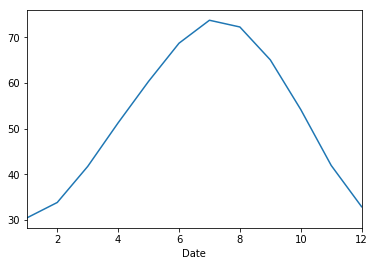

In [294]:
df.groupby(by=df.index.month)['TAVG'].mean().plot()

# An important investigation

Inside of the `climate` folder there is a file called `california.txt`: it's the same data, but only for California. Using this data, tell me **if droughts have been getting worse over the past 100 years.**

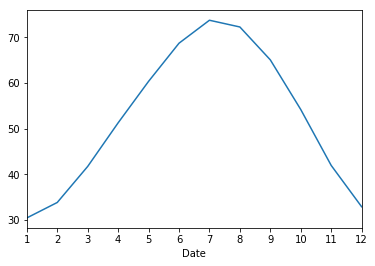

In [296]:
ax = df.groupby(by=df.index.month)['TAVG'].mean().plot()
ax.xaxis.set_ticks([1,2,3,4,5,6,7,8,9,10,11,12])

# Making comparisons

There are datasets for **five** other states. Please compare them in some way, building me a graphic. Even though we did it the other day, you do **not** need to combine them into one dataframe.

Some basic ideas:

- Graph their average temperatures over the year so we can see which one is the hottest
- Graph the difference between the highs/lows over the year so we can see which has the hottest temperature swings
- Graph their propensity to drought, highlighting the most drough-ridden state in a different color